In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crd_data=pd.read_csv("/content/credit_risk_dataset.csv")

In [ ]:
crd_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# ***Exploring The Data***

In [3]:

crd_data.shape

(32581, 12)

In [4]:
crd_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
crd_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
crd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
crd_data.duplicated().sum()

165

In [8]:
crd_data[crd_data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [9]:
crd_data.shape

(32581, 12)

In [10]:
crd_data.drop_duplicates(inplace=True)

In [ ]:
crd_data.shape

(32416, 12)

In [11]:
crd_data.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [12]:
crd_data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [13]:
crd_data.isnull().sum()/len(crd_data)*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.736303
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.547754
loan_status,0.000000
loan_percent_income,0.000000


In [14]:
crd_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [15]:
numerical_cols = crd_data.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


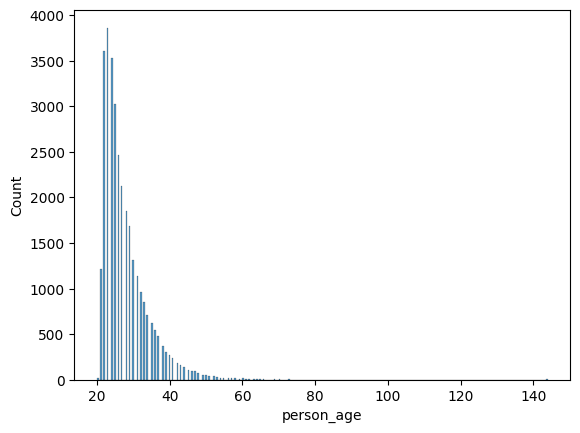

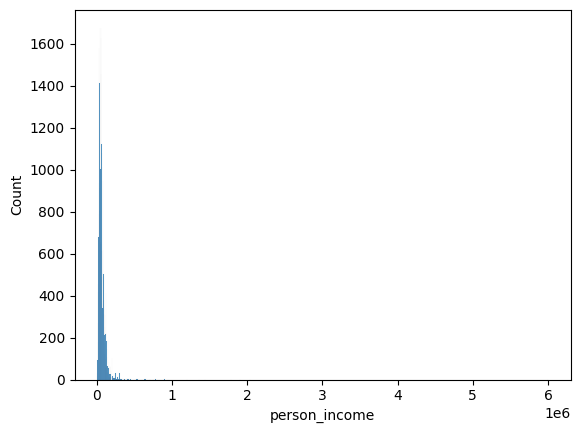

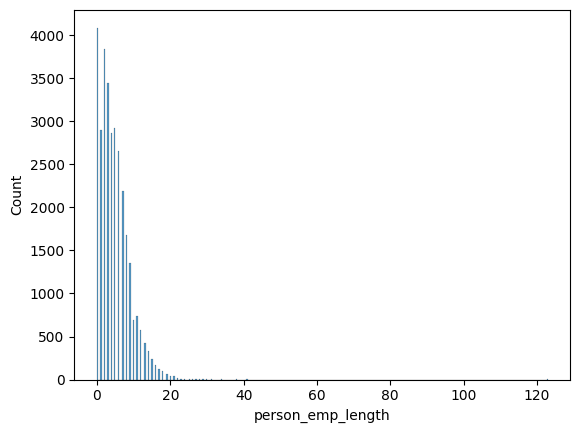

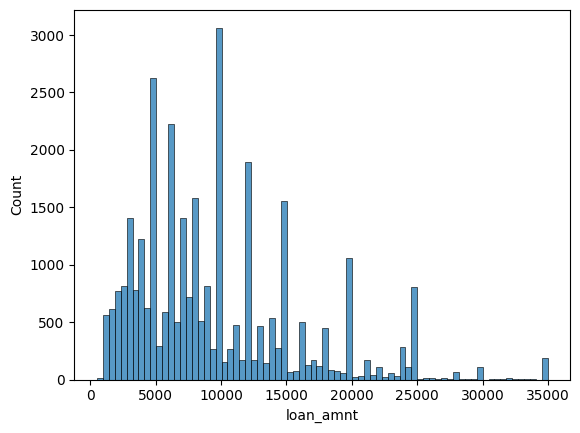

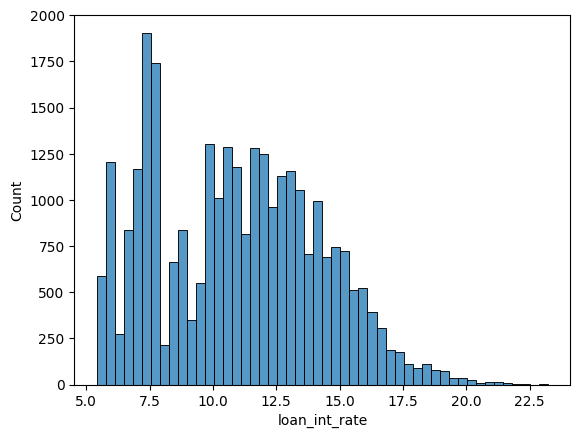

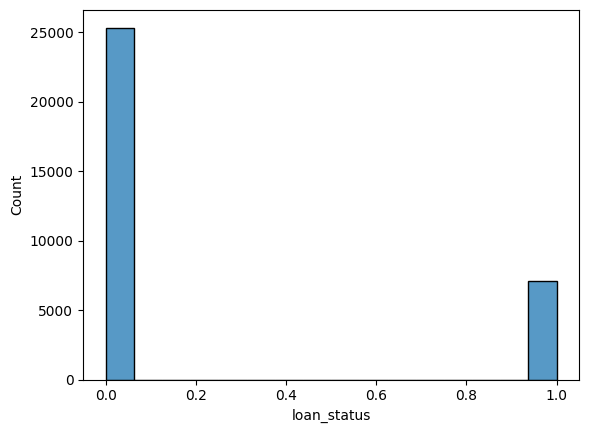

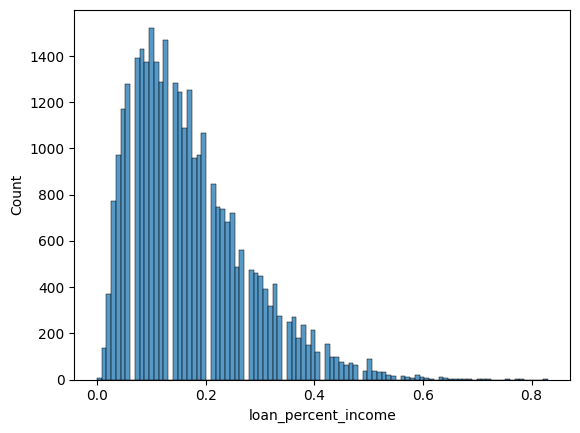

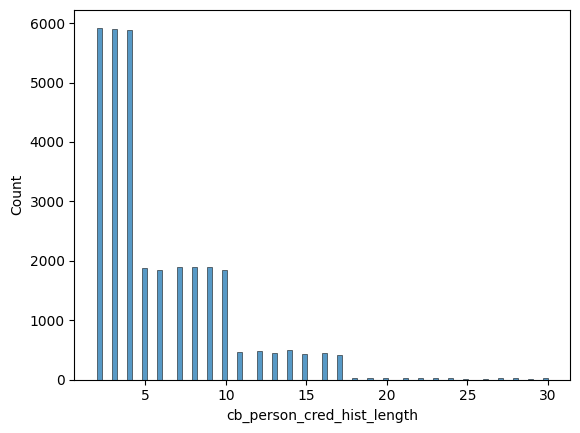

In [16]:
for col in numerical_cols:
    sns.histplot(crd_data[col])
    plt.show()

In [17]:
crd_data.loc[crd_data['person_age']>=88,:]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27


In [18]:
crd_data['loan_int_rate'].fillna(crd_data['loan_int_rate'].mean(), inplace=True)
crd_data['person_emp_length'].fillna(crd_data['person_emp_length'].mode()[0], inplace=True)

<ipython-input-18-9b64ac4b45f0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crd_data['loan_int_rate'].fillna(crd_data['loan_int_rate'].mean(), inplace=True)
<ipython-input-18-9b64ac4b45f0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:
crd_data.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


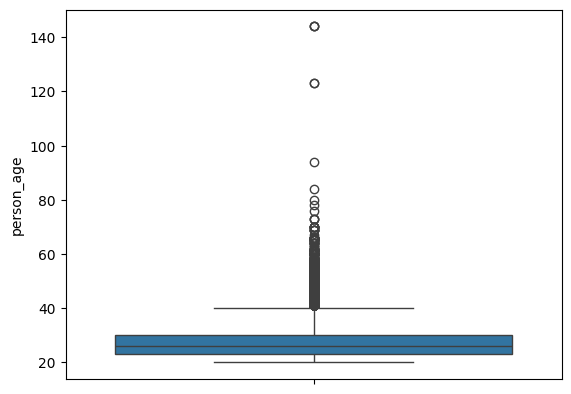

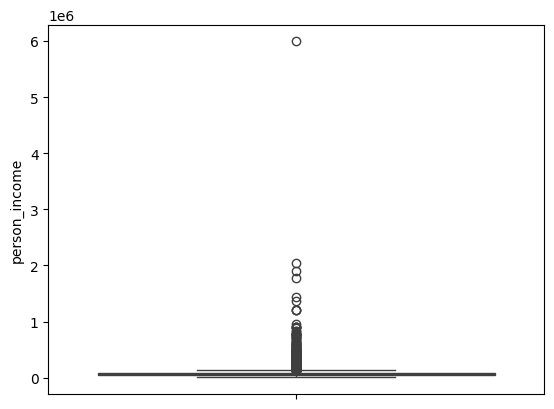

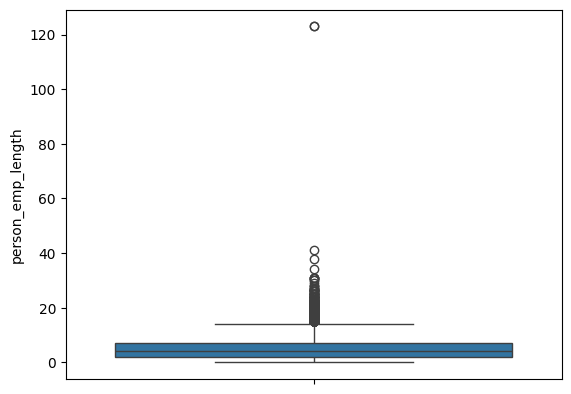

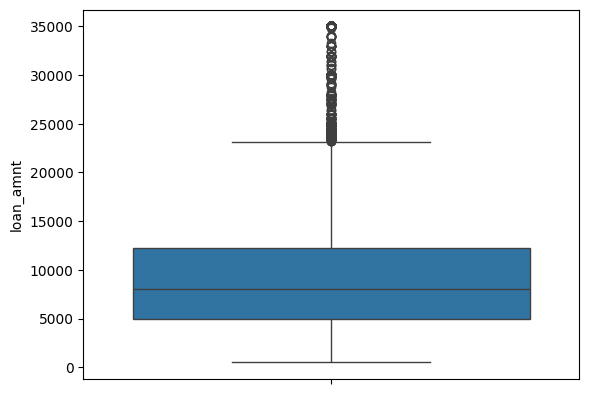

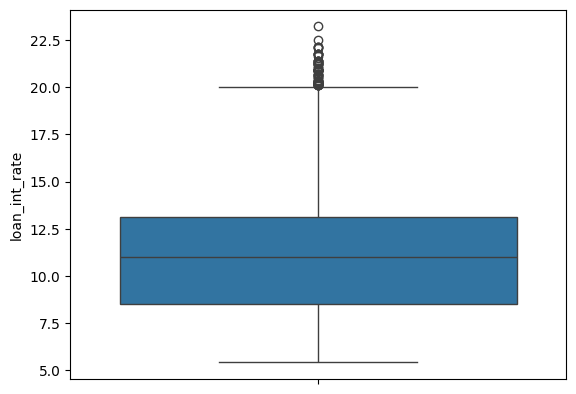

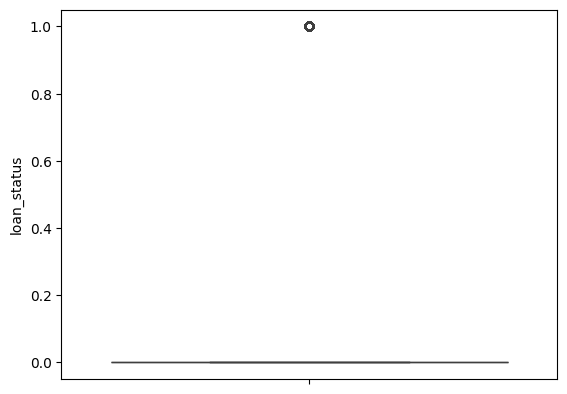

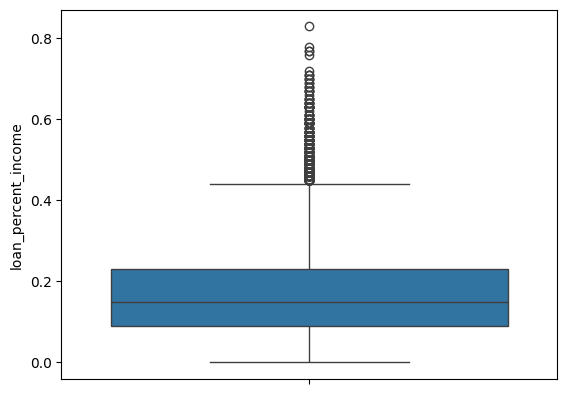

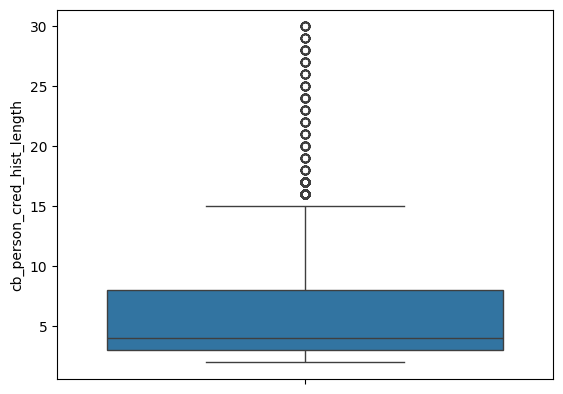

In [19]:
numerical_cols = crd_data.select_dtypes(include=['number']).columns
print(numerical_cols)
for col in numerical_cols:
    sns.boxplot(crd_data[col])
    plt.show()

In [20]:
numerical_cols = crd_data.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = crd_data[col].quantile(0.25)
    Q3 = crd_data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    crd_data = crd_data[(crd_data[col] >= lower_bound) & (crd_data[col] <= upper_bound)]

# Now, crd_data contains the data with outliers removed from all numerical columns.

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


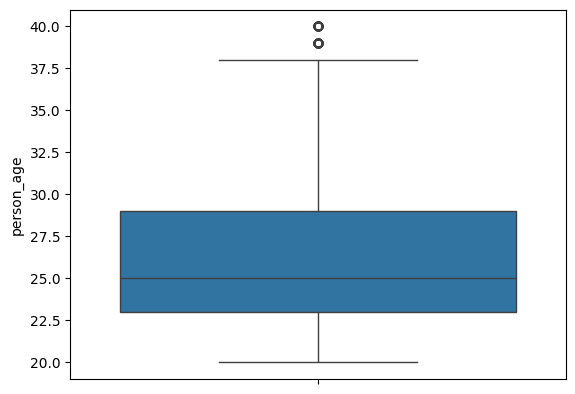

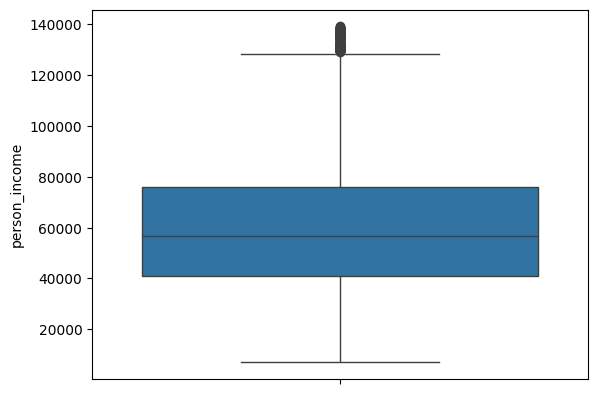

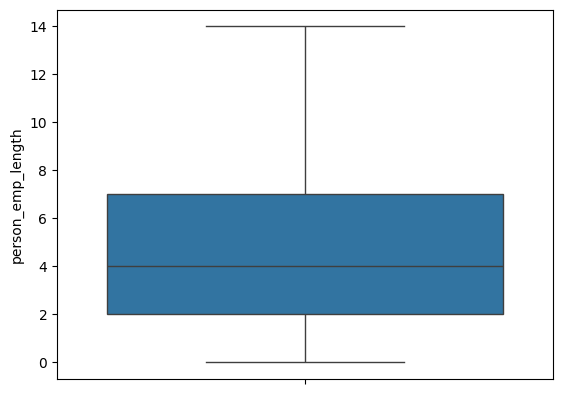

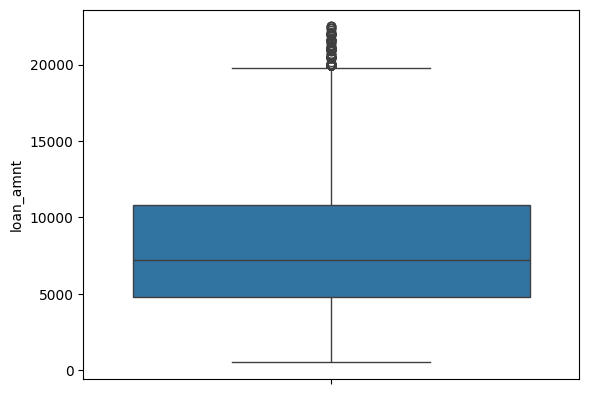

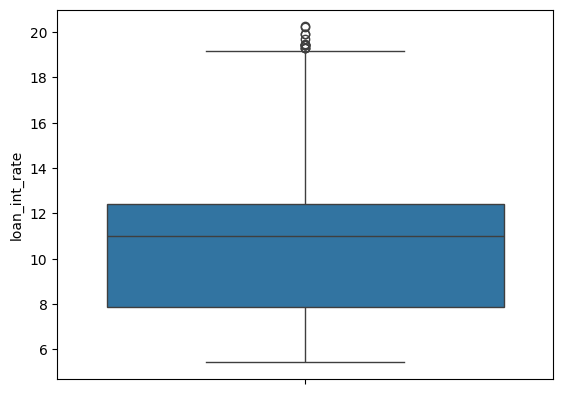

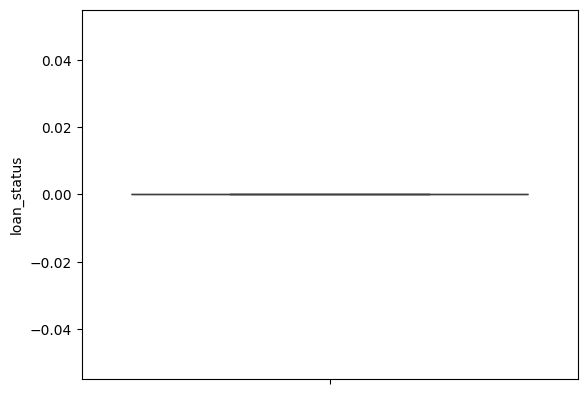

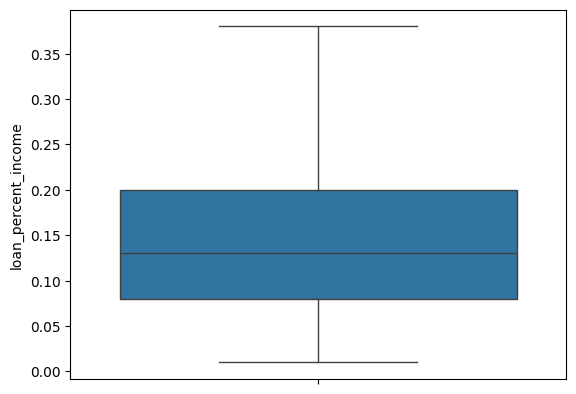

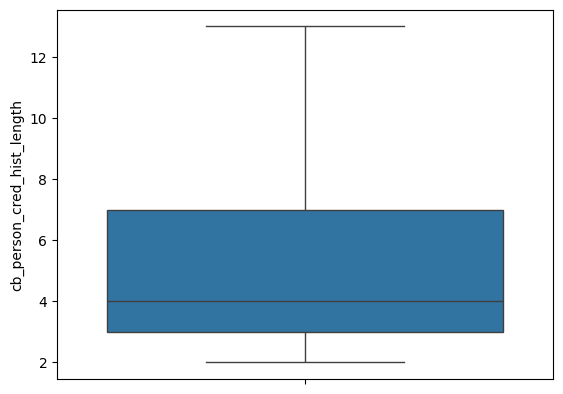

In [21]:
numerical_cols = crd_data.select_dtypes(include=['number']).columns
print(numerical_cols)
for col in numerical_cols:
    sns.boxplot(crd_data[col])
    plt.show()

In [22]:
crd_data.shape

(20626, 12)

In [23]:
crd_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,20626.000000,20626.000000,20626.000000,20626.000000,20626.000000,20626.0,20626.000000,20626.000000
mean,26.240522,61012.704257,4.389751,8169.213614,10.428055,0.0,0.144377,4.857704
std,3.973511,26090.907879,3.413142,4654.479436,2.818826,0.0,0.076378,2.715249
min,20.000000,7000.000000,0.000000,500.000000,5.420000,0.0,0.010000,2.000000
25%,23.000000,40944.000000,2.000000,4800.000000,7.880000,0.0,0.080000,3.000000
50%,25.000000,56864.000000,4.000000,7200.000000,10.990000,0.0,0.130000,4.000000
75%,29.000000,76000.000000,7.000000,10800.000000,12.420000,0.0,0.200000,7.000000
max,40.000000,139200.000000,14.000000,22500.000000,20.250000,0.0,0.380000,13.000000


# ***Univariate Analysis***

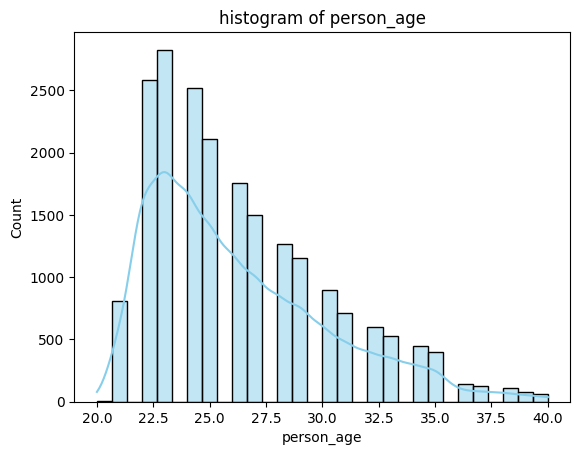

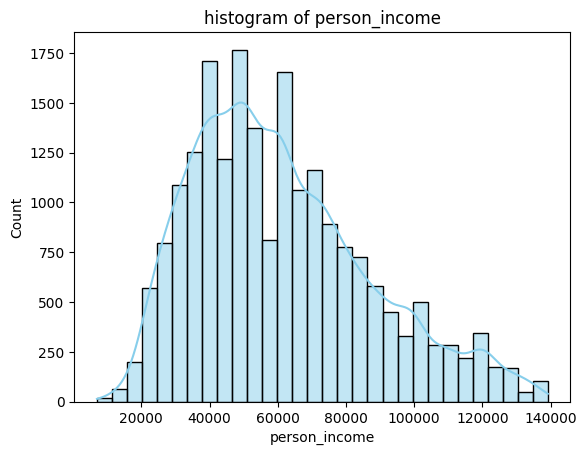

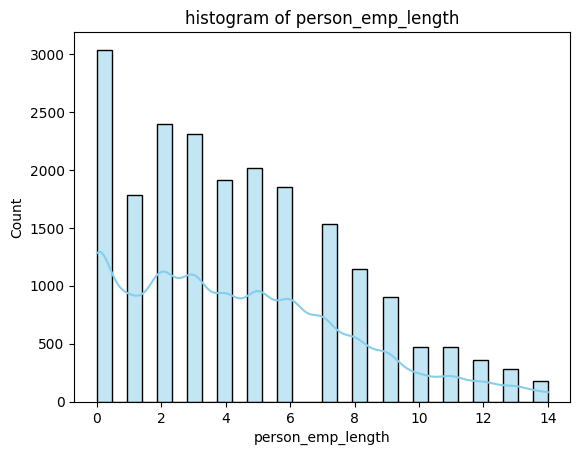

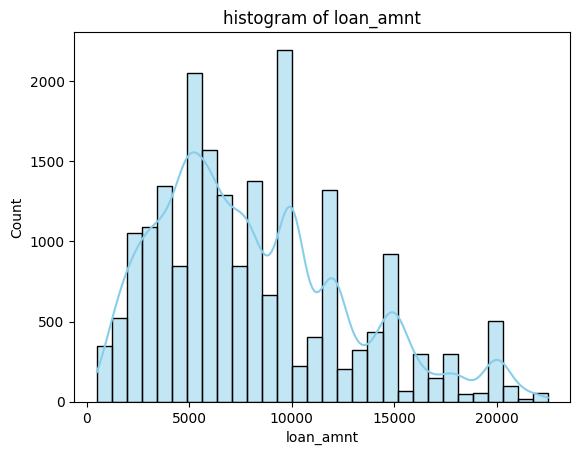

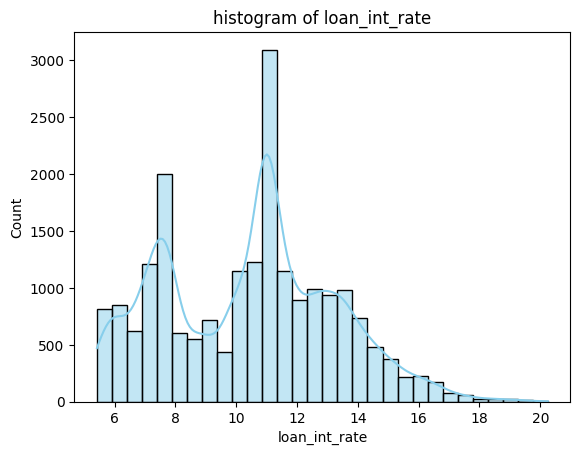

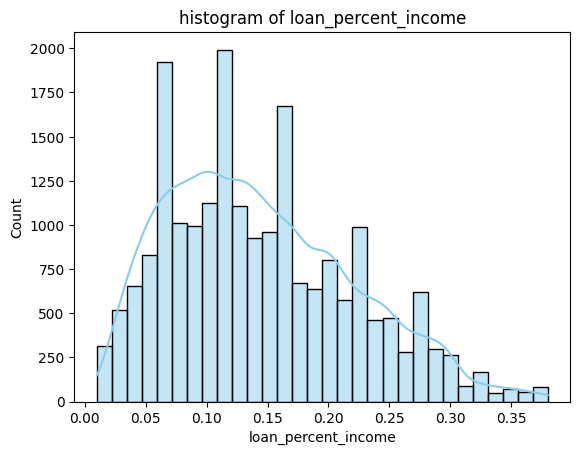

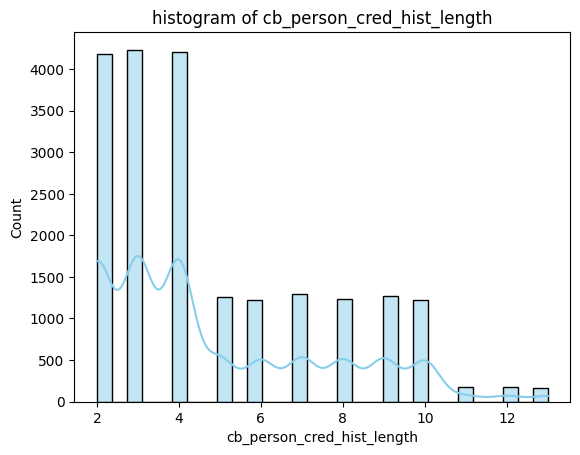

In [24]:
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


# Numerical variables: Histogram
for col in numerical_columns:
    plt.figure()
    sns.histplot(crd_data,x=crd_data[col],color='skyblue',bins=30,kde=True)
    plt.title(f'histogram of {col}')
    plt.show()

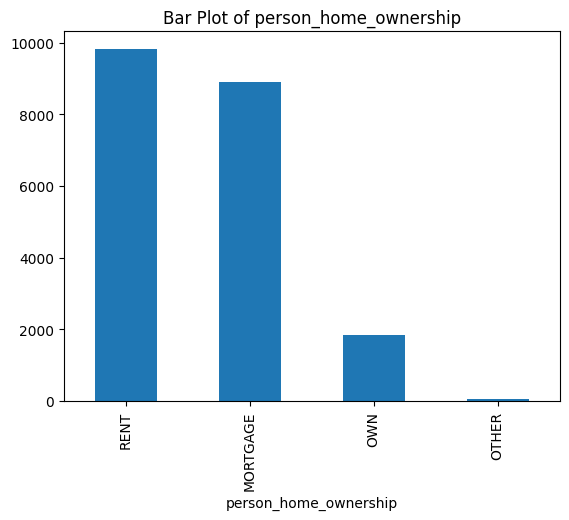

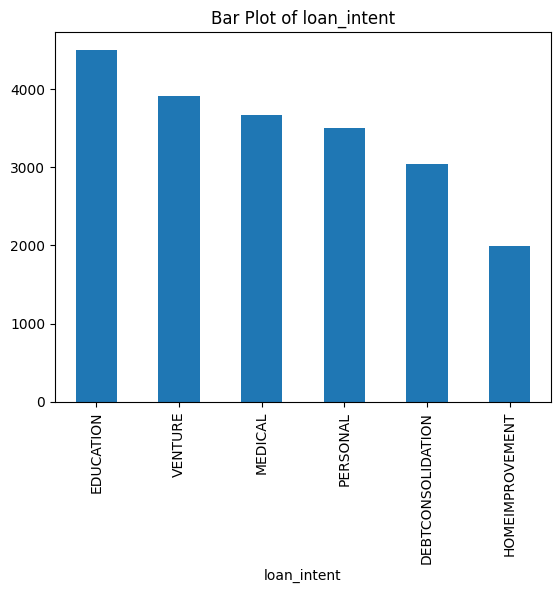

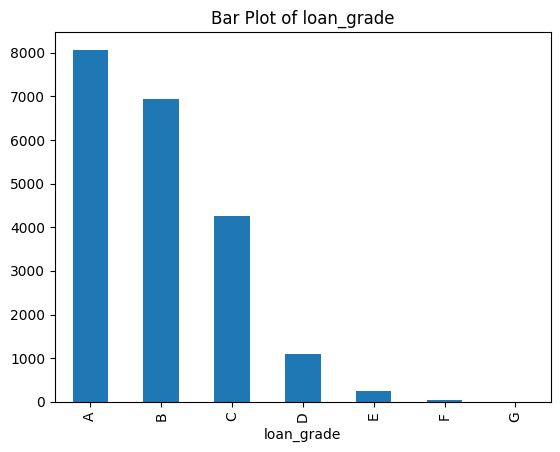

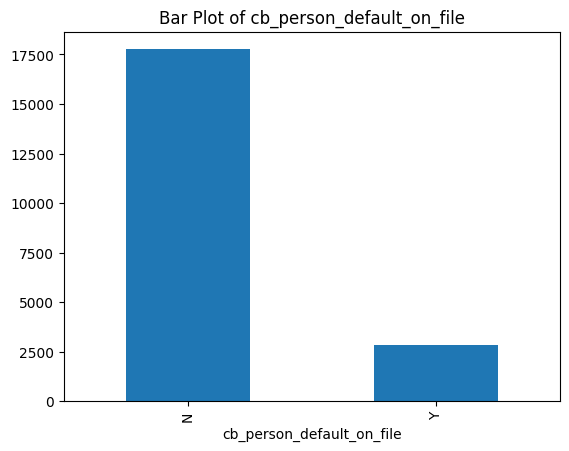

In [26]:
#Categorical variables: Bar plots
categorical_columns = crd_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure()
    crd_data[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.show()

# ***Bivariate Analysis***

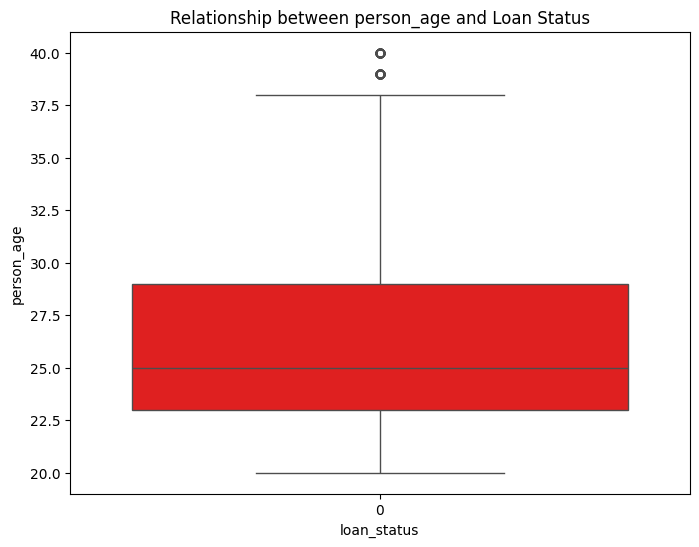

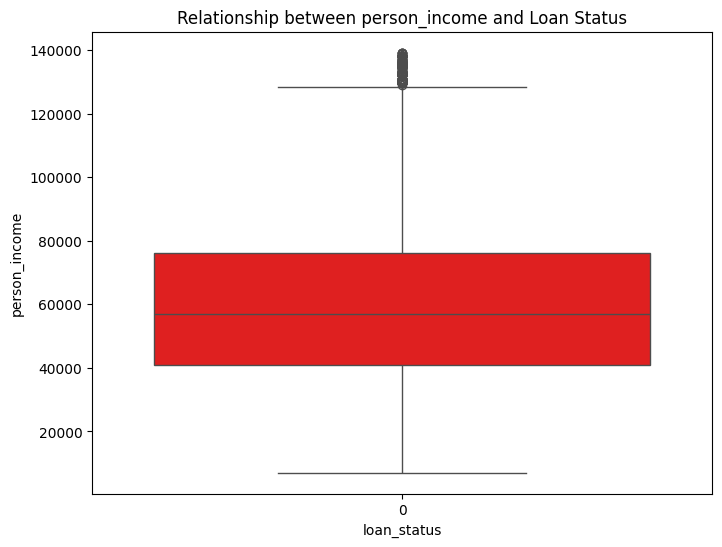

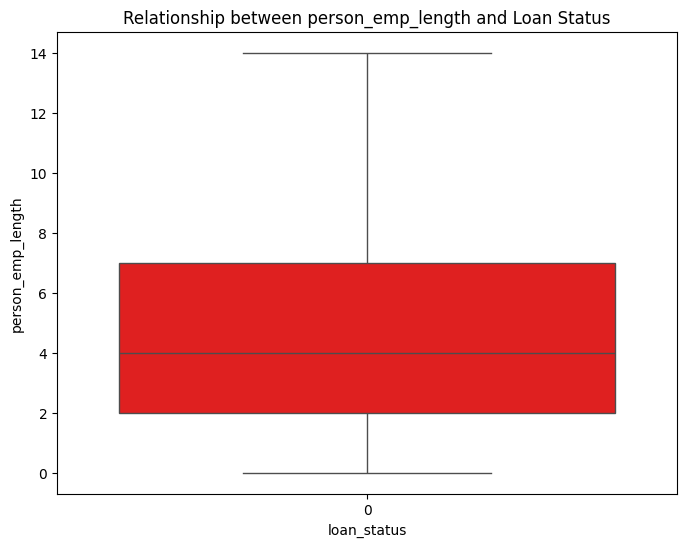

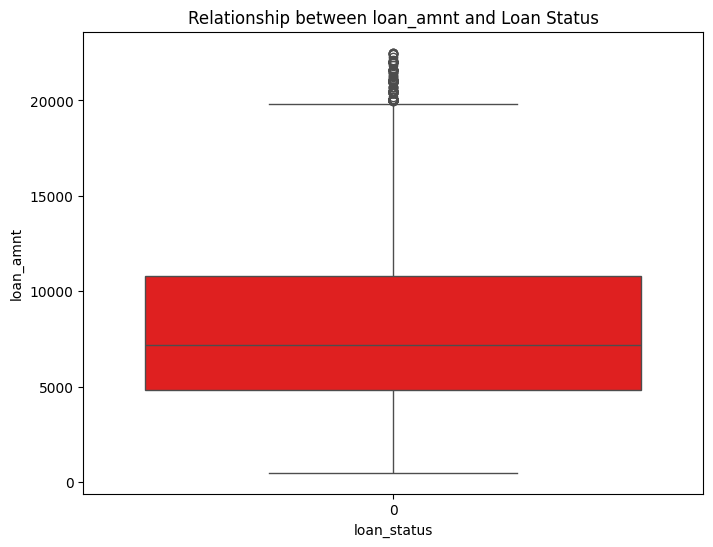

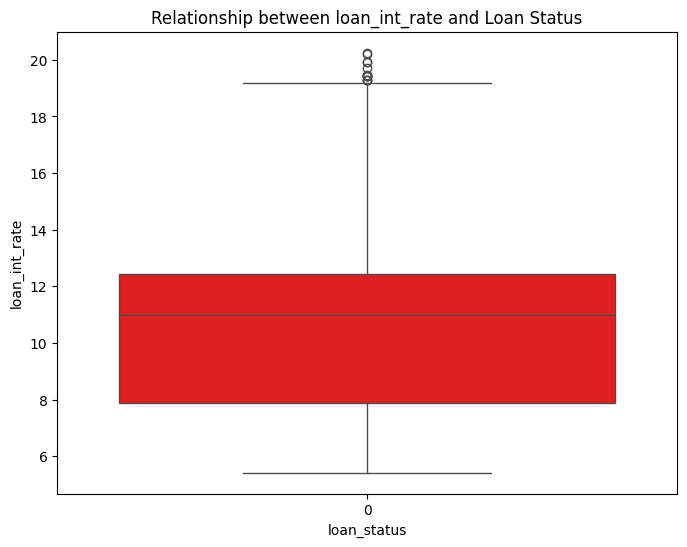

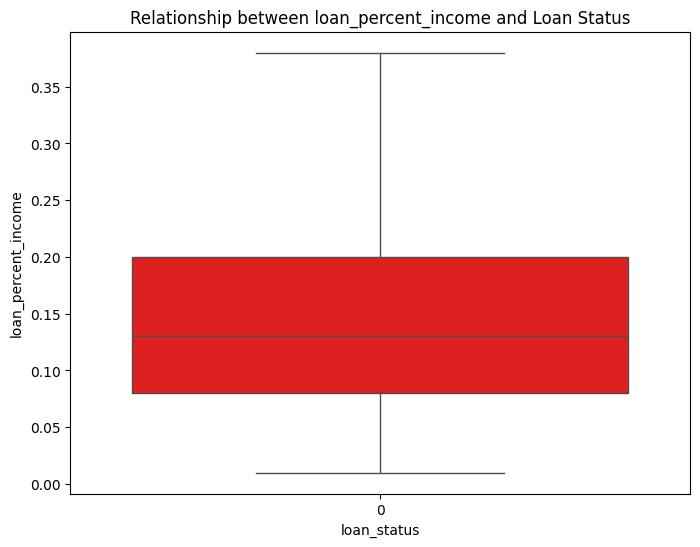

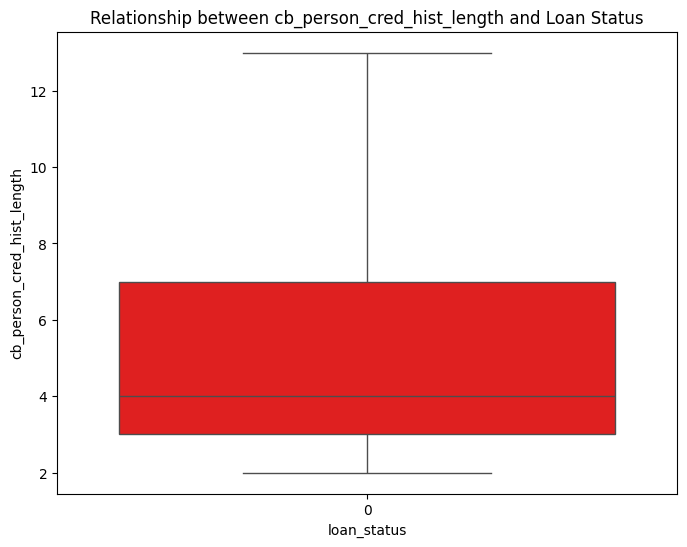

In [27]:
# Analyze relationship with numerical features
for feature in numerical_columns:
    if feature != 'loan_status':  # Exclude the target variable itself
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='loan_status', y=feature, data=crd_data, color='red')  # Set color to red
        plt.title(f'Relationship between {feature} and Loan Status')

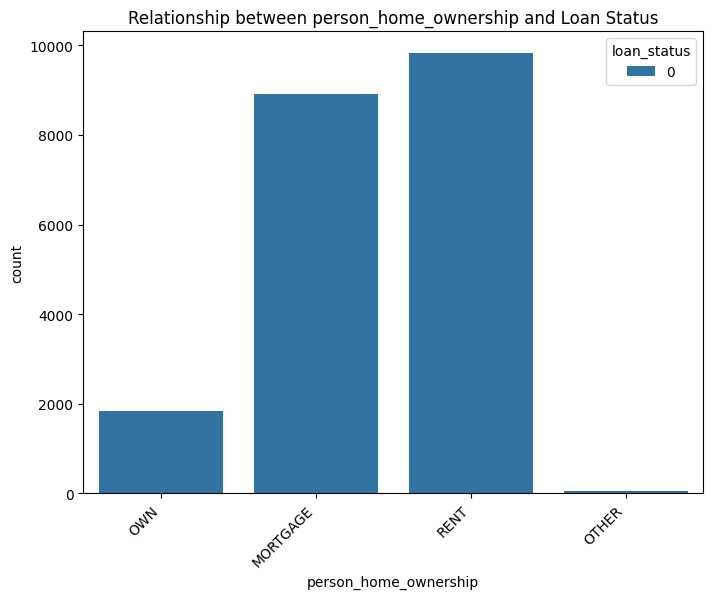

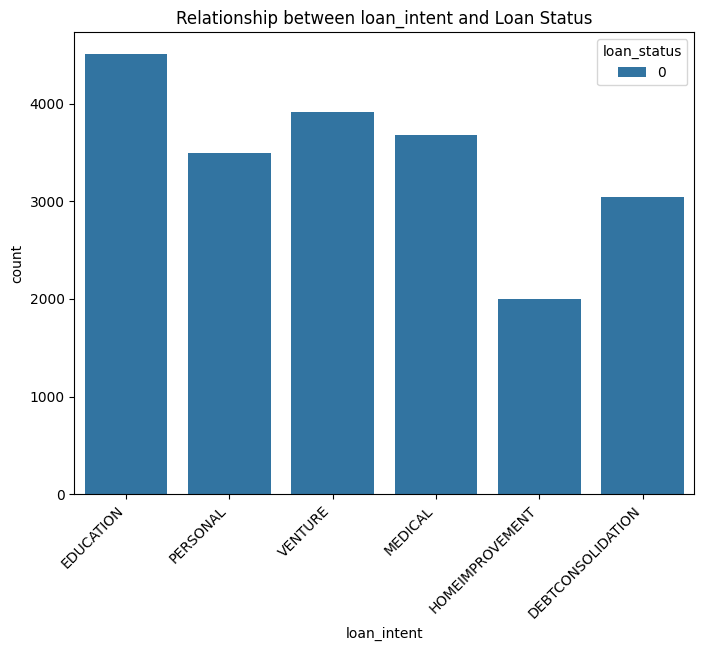

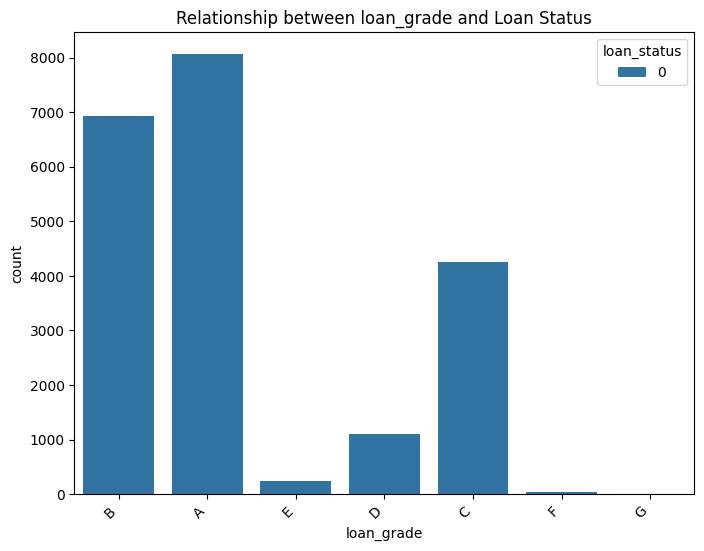

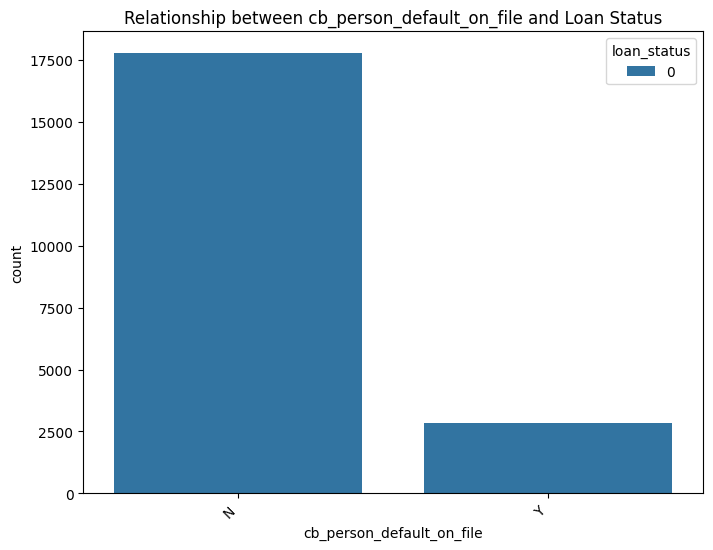

In [29]:
# Analyze relationship with categorical features
for feature in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='loan_status', data=crd_data)
    plt.title(f'Relationship between {feature} and Loan Status')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# ***Multivariate Analysis***

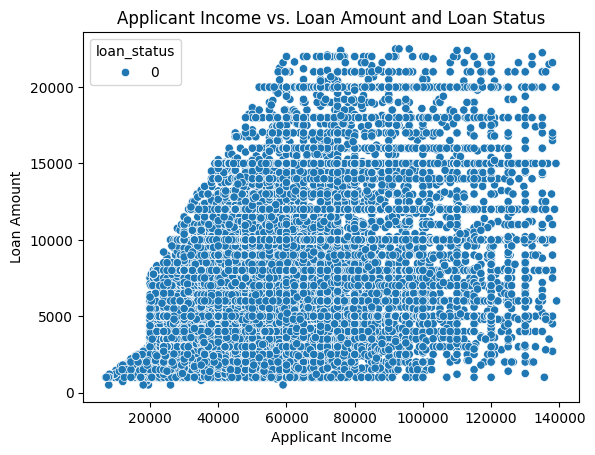

In [31]:

sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=crd_data)
plt.title('Applicant Income vs. Loan Amount and Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

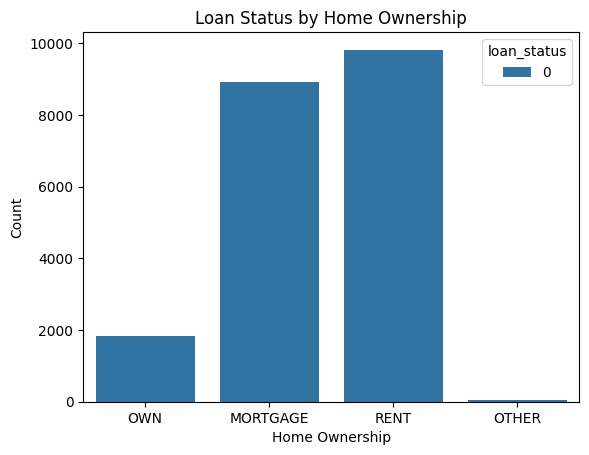

In [32]:

sns.countplot(x='person_home_ownership', hue='loan_status', data=crd_data)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()

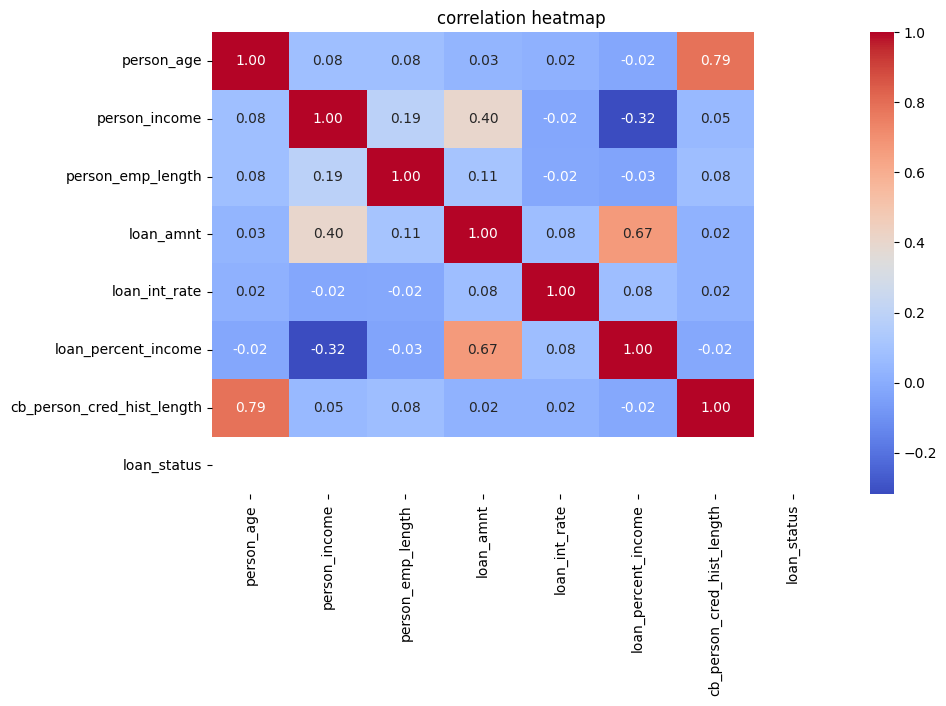

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.082953,0.080439,0.034673,0.018152,-0.024704,0.786951
person_income,0.082953,1.000000,0.187010,0.397344,-0.020258,-0.318821,0.053845
person_emp_length,0.080439,0.187010,1.000000,0.107834,-0.017844,-0.032959,0.077769
loan_amnt,0.034673,0.397344,0.107834,1.000000,0.075009,0.667807,0.024980
loan_int_rate,0.018152,-0.020258,-0.017844,0.075009,1.000000,0.075531,0.023052
loan_percent_income,-0.024704,-0.318821,-0.032959,0.667807,0.075531,1.000000,-0.015036
cb_person_cred_hist_length,0.786951,0.053845,0.077769,0.024980,0.023052,-0.015036,1.000000


In [36]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10,6))
sns.heatmap(crd_data[numerical_columns+['loan_status']].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('correlation heatmap')
plt.show()
crd_data[numerical_columns].corr()


## ***Insights***


**Financial Stability:** Income, employment history, and homeownership are strong indicators of a borrower's ability to repay loans.

**Loan Characteristics:**Loan amount and interest rate play a crucial role in risk assessment. Larger loans with higher interest rates increase the likelihood of default.

**Credit History:** Past defaults and loan grade are powerful predictors of future default behavior.

**Loan Purpose:** Certain loan purposes like debt consolidation might be associated with higher risk.